# modeling data in python:

Most popular package is scikit learn. Scikit-learn is not the best for a 'traditional' stats approach.

the statsmodels library is better suited for traditional stats


Be sure to visit and read the documentation on the StatsModels website: https://www.statsmodels.org/stable/index.html



In [1]:
# the statsmodels.api uses numpy array notation
# statsmodels.formula.api use formula notation (similar to R's formula notation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# A minimal OLS example

Four pairs of points

In [2]:
x = np.array([1,2,3,4])
y = np.array([2,6,4,8])

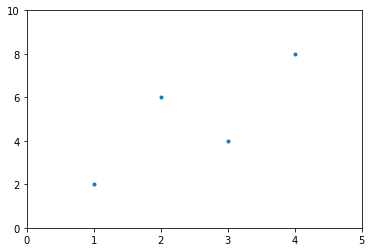

In [3]:
plt.scatter(x,y, marker = '.')
plt.xlim(0,5)
plt.ylim(0,10)
plt.show()

In [4]:
# make a dataframe of our data
d = pd.DataFrame({'x':x, 'y':y})
print(d)

   x  y
0  1  2
1  2  6
2  3  4
3  4  8


Seaborn lmplot

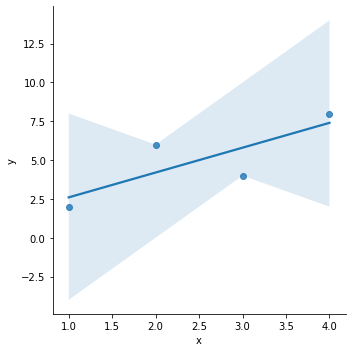

In [5]:
sns.lmplot(x = 'x', y = 'y', data = d)

## formula notation with statsmodels
use statsmodels.formula.api (often imported as smf)

In [6]:
# data is in a dataframe
model = smf.ols('y ~ x', data = d)

In [7]:
print(model)

In [8]:
# estimation of coefficients is not done until you call fit() on the model
results = model.fit()

In [9]:
print(results)

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.200
Time:                        14:24:36   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0000      2.324      0.430      0.7

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Using the abline_plot function for plotting the results

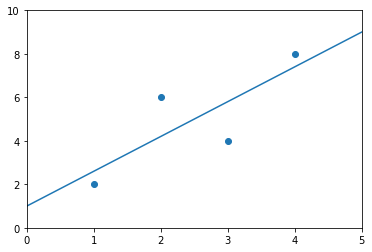

In [11]:
sm.graphics.abline_plot(model_results = results)
plt.scatter(d.x, d.y)

plt.xlim(0,5)
plt.ylim(0,10)

plt.show()

Generating an anova table

In [12]:
print(sm.stats.anova_lm(results))

           df  sum_sq  mean_sq         F  PR(>F)
x         1.0    12.8     12.8  3.555556     0.2
Residual  2.0     7.2      3.6       NaN     NaN


Making predictions

In [13]:
results.predict({'x' : 2})

0    4.2
dtype: float64

## numpy array notation
similar to sklearn's notation

In [14]:
print(x)

[1 2 3 4]


In [15]:
X = sm.add_constant(x)  # need to add a constant for the intercept term.
# because we are using the numpy notation, we use sm rather than smf

In [16]:
print(X)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]]


$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\mathbf{\hat{Y}} = \boldsymbol{\beta} \mathbf{X}$$


In [17]:
model2 = sm.OLS(y, X)  # OLS is capitalized in the numpy notation

In [18]:
results2 = model2.fit()

In [19]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.200
Time:                        14:24:36   Log-Likelihood:                -6.8513
No. Observations:                   4   AIC:                             17.70
Df Residuals:                       2   BIC:                             16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000      2.324      0.430      0.7

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


OLS solution:

$$(X^TX)^{-1}X^TY$$

In [20]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [21]:
np.linalg.inv(X.T @ X) @ (X.T @ y)

array([1. , 1.6])